# Heart Diesease Prediction by Tree Model

In [1]:
#Importing files
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [2]:
# Reading the csv file and putting it into 'df' object.
df=pd.read_csv(r"C:\Users\spandit\Desktop\ITS\Personal\AIML\Tree_Models\heart_v2.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
# Putting feature variable to X
X=df.drop('heart disease', axis=1)

# Putting response variable to y
y=df['heart disease']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape,X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
!pip install six
!pip install pydotplus
!pip install graphviz

In [10]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

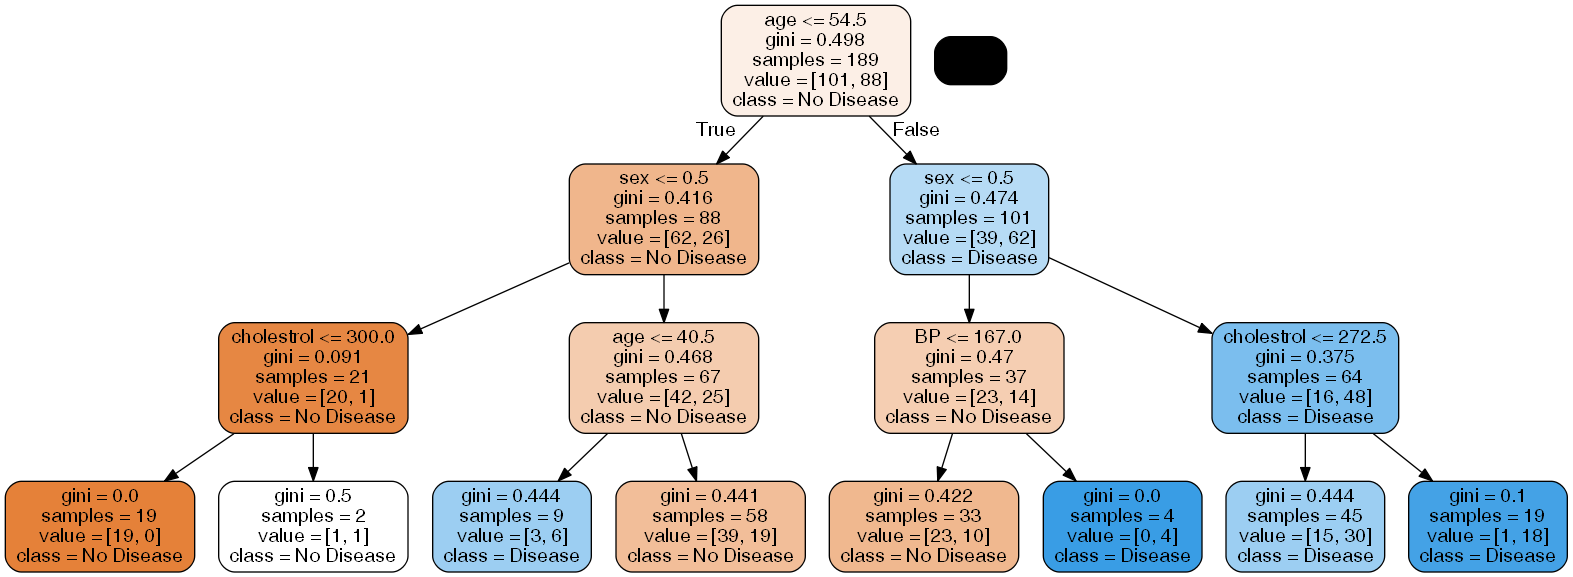

In [11]:
# plotting tree with max_depth=3
dot_data=StringIO()

export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,
               feature_names=X.columns,
               class_names=['No Disease','Disease'])

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Evaluating model performance

In [12]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [15]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

Creating helper functions to evaluate model performance and help plot the decision tree

In [16]:
def get_dt_graph(dt_classifier):
    dot_data=StringIO()
    export_graphviz(dt_classifier,out_file=dot_data,filled=True,rounded=True,
                   feature_names=X.columns,
                   class_names=['Disease',"No Disease"])
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [18]:
def evaluate_model(dt_classifier):
    print("Train Accuracy : ",accuracy_score(y_train,dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy : ",accuracy_score(y_test,dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))

## Without setting any hyper-parameters

In [20]:
dt_default=DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

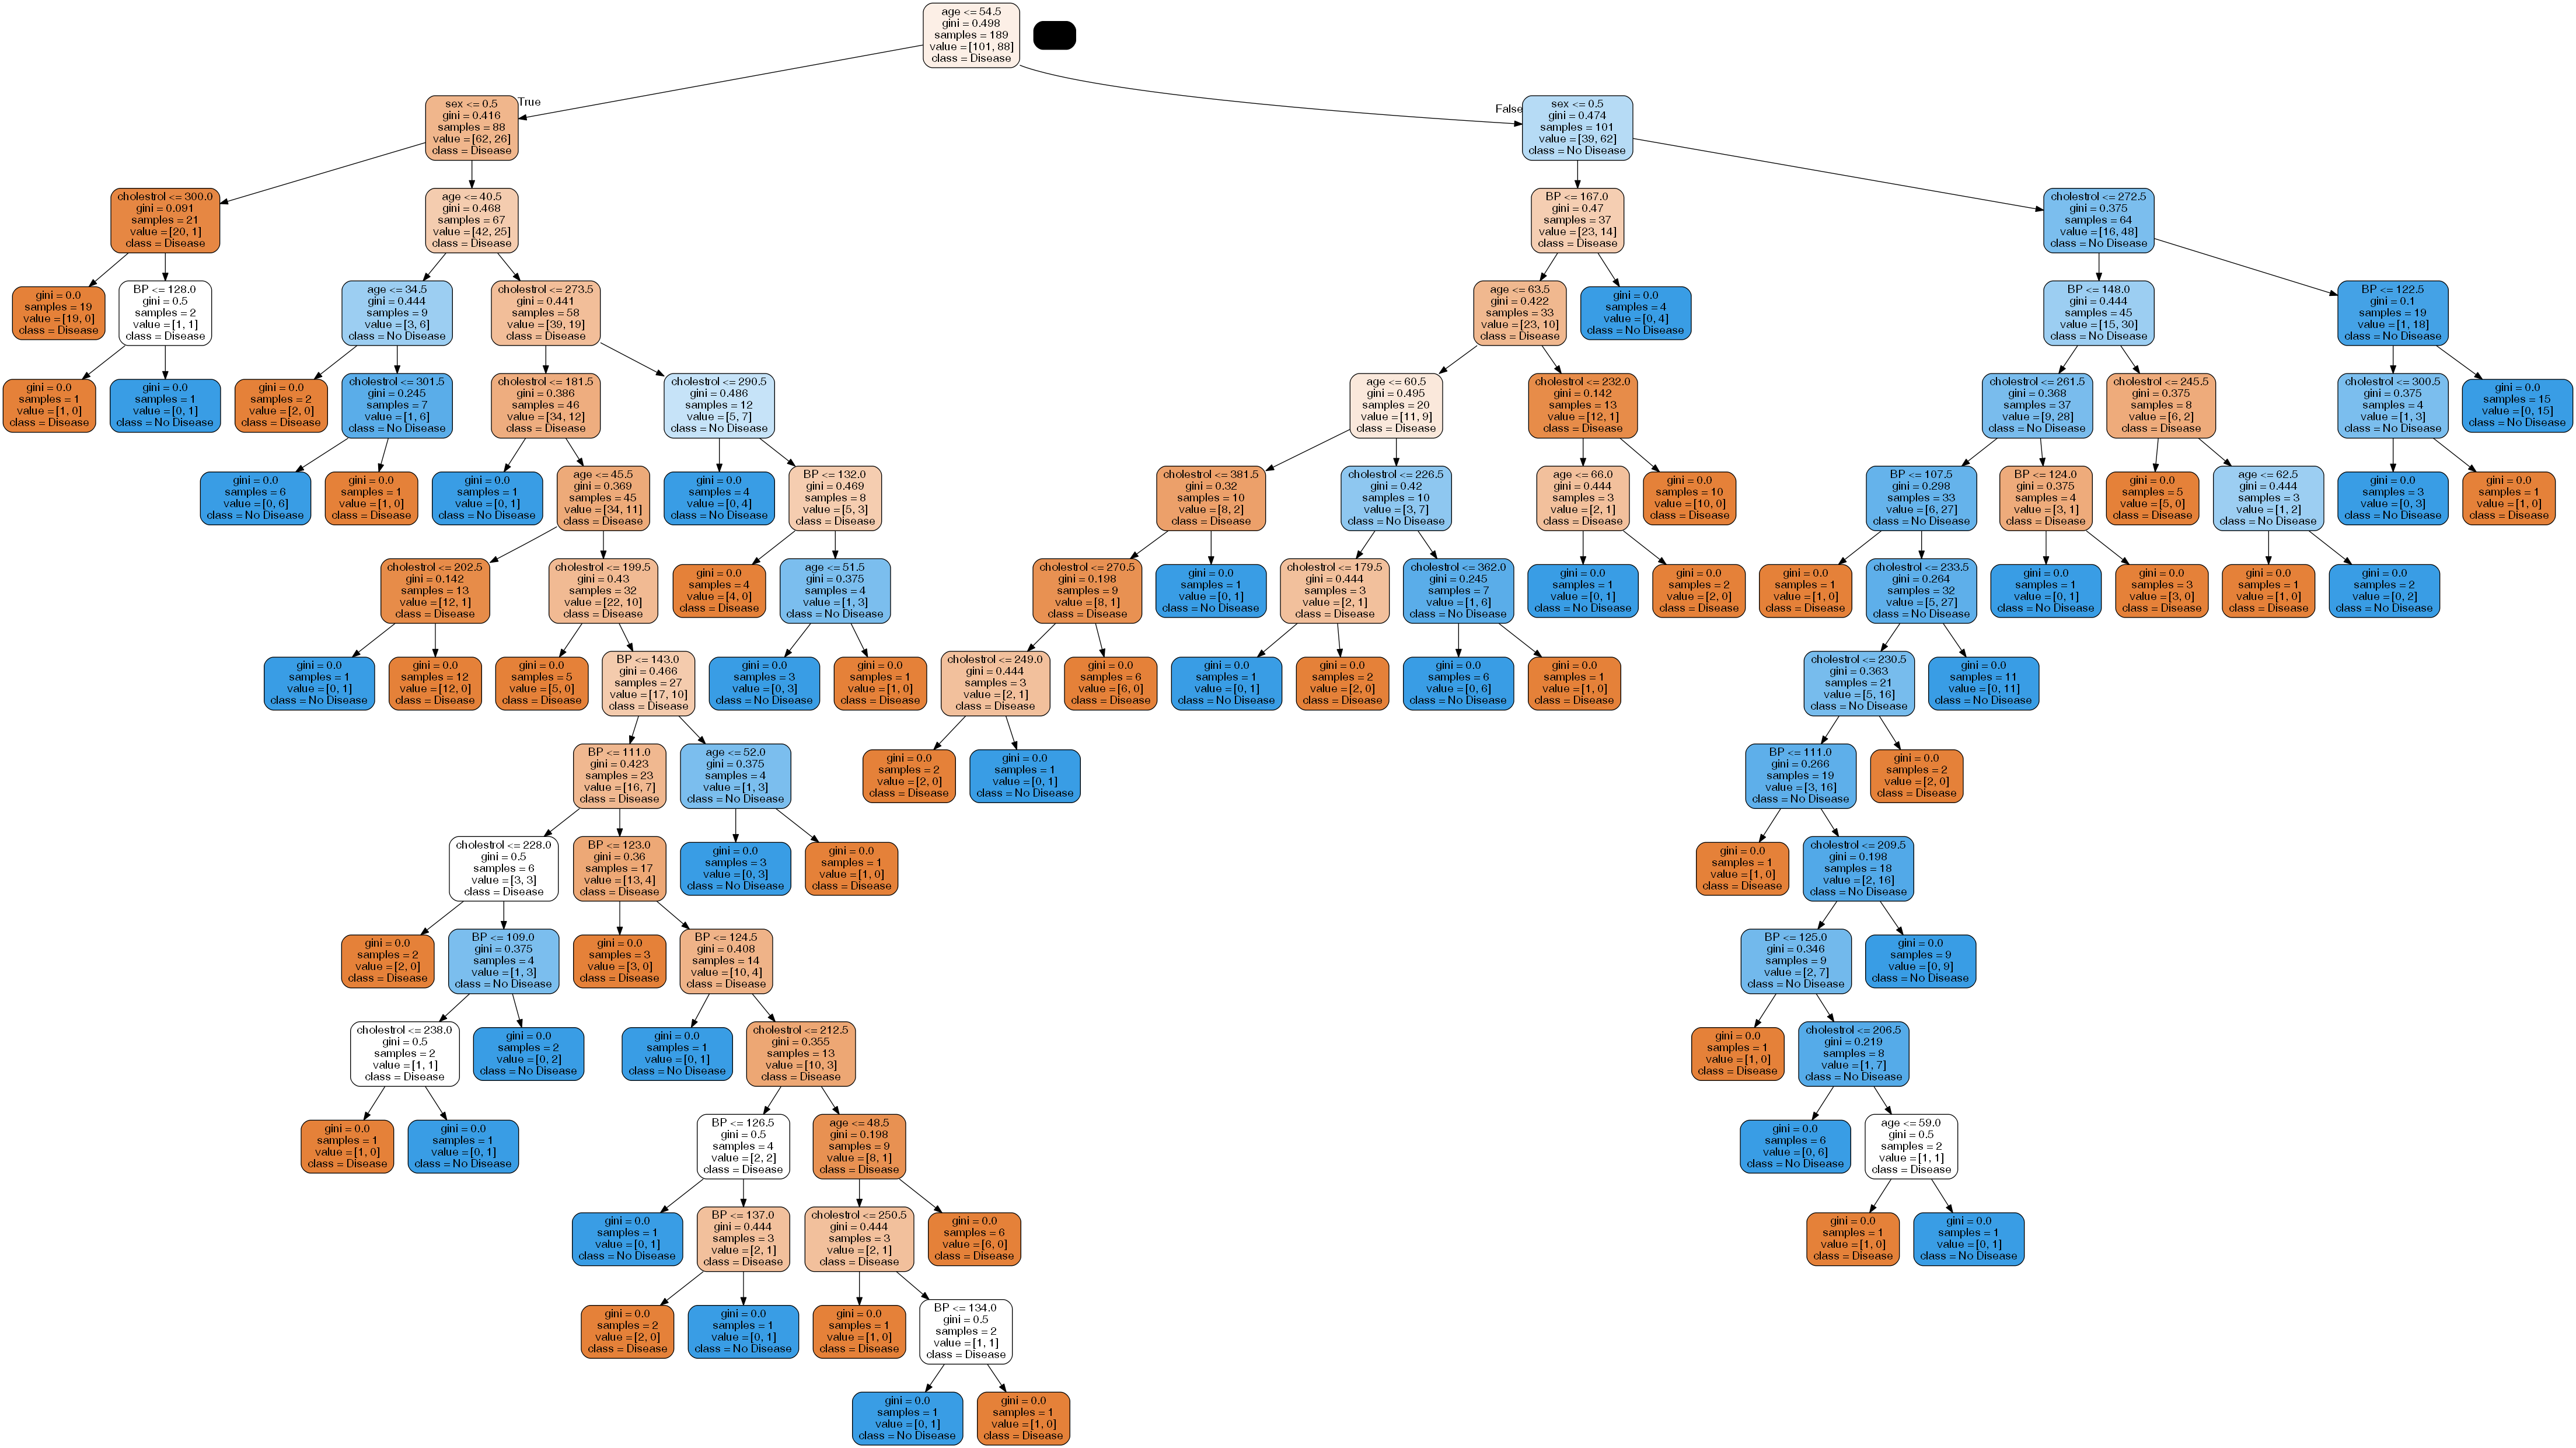

In [21]:
gph=get_dt_graph(dt_default)
Image(gph.create_png())

In [22]:
evaluate_model(dt_default)

Train Accuracy :  1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy :  0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


## Controlling the depth of the tree

In [23]:
?DecisionTreeClassifier

In [24]:
dt_depth=DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

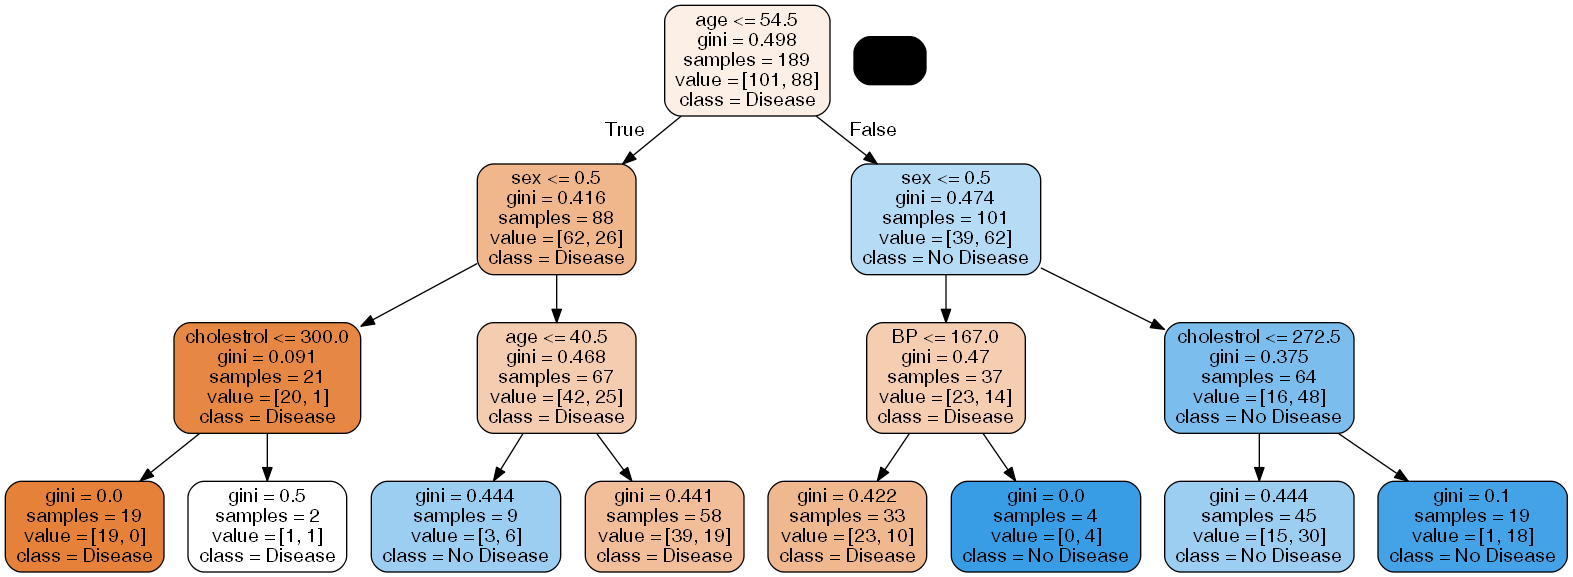

In [25]:
gph=get_dt_graph(dt_depth)
Image(gph.create_png())

In [26]:
evaluate_model(dt_depth)

Train Accuracy :  0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy :  0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


## Specifying minimum samples before split

In [28]:
dt_min_split=DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20)

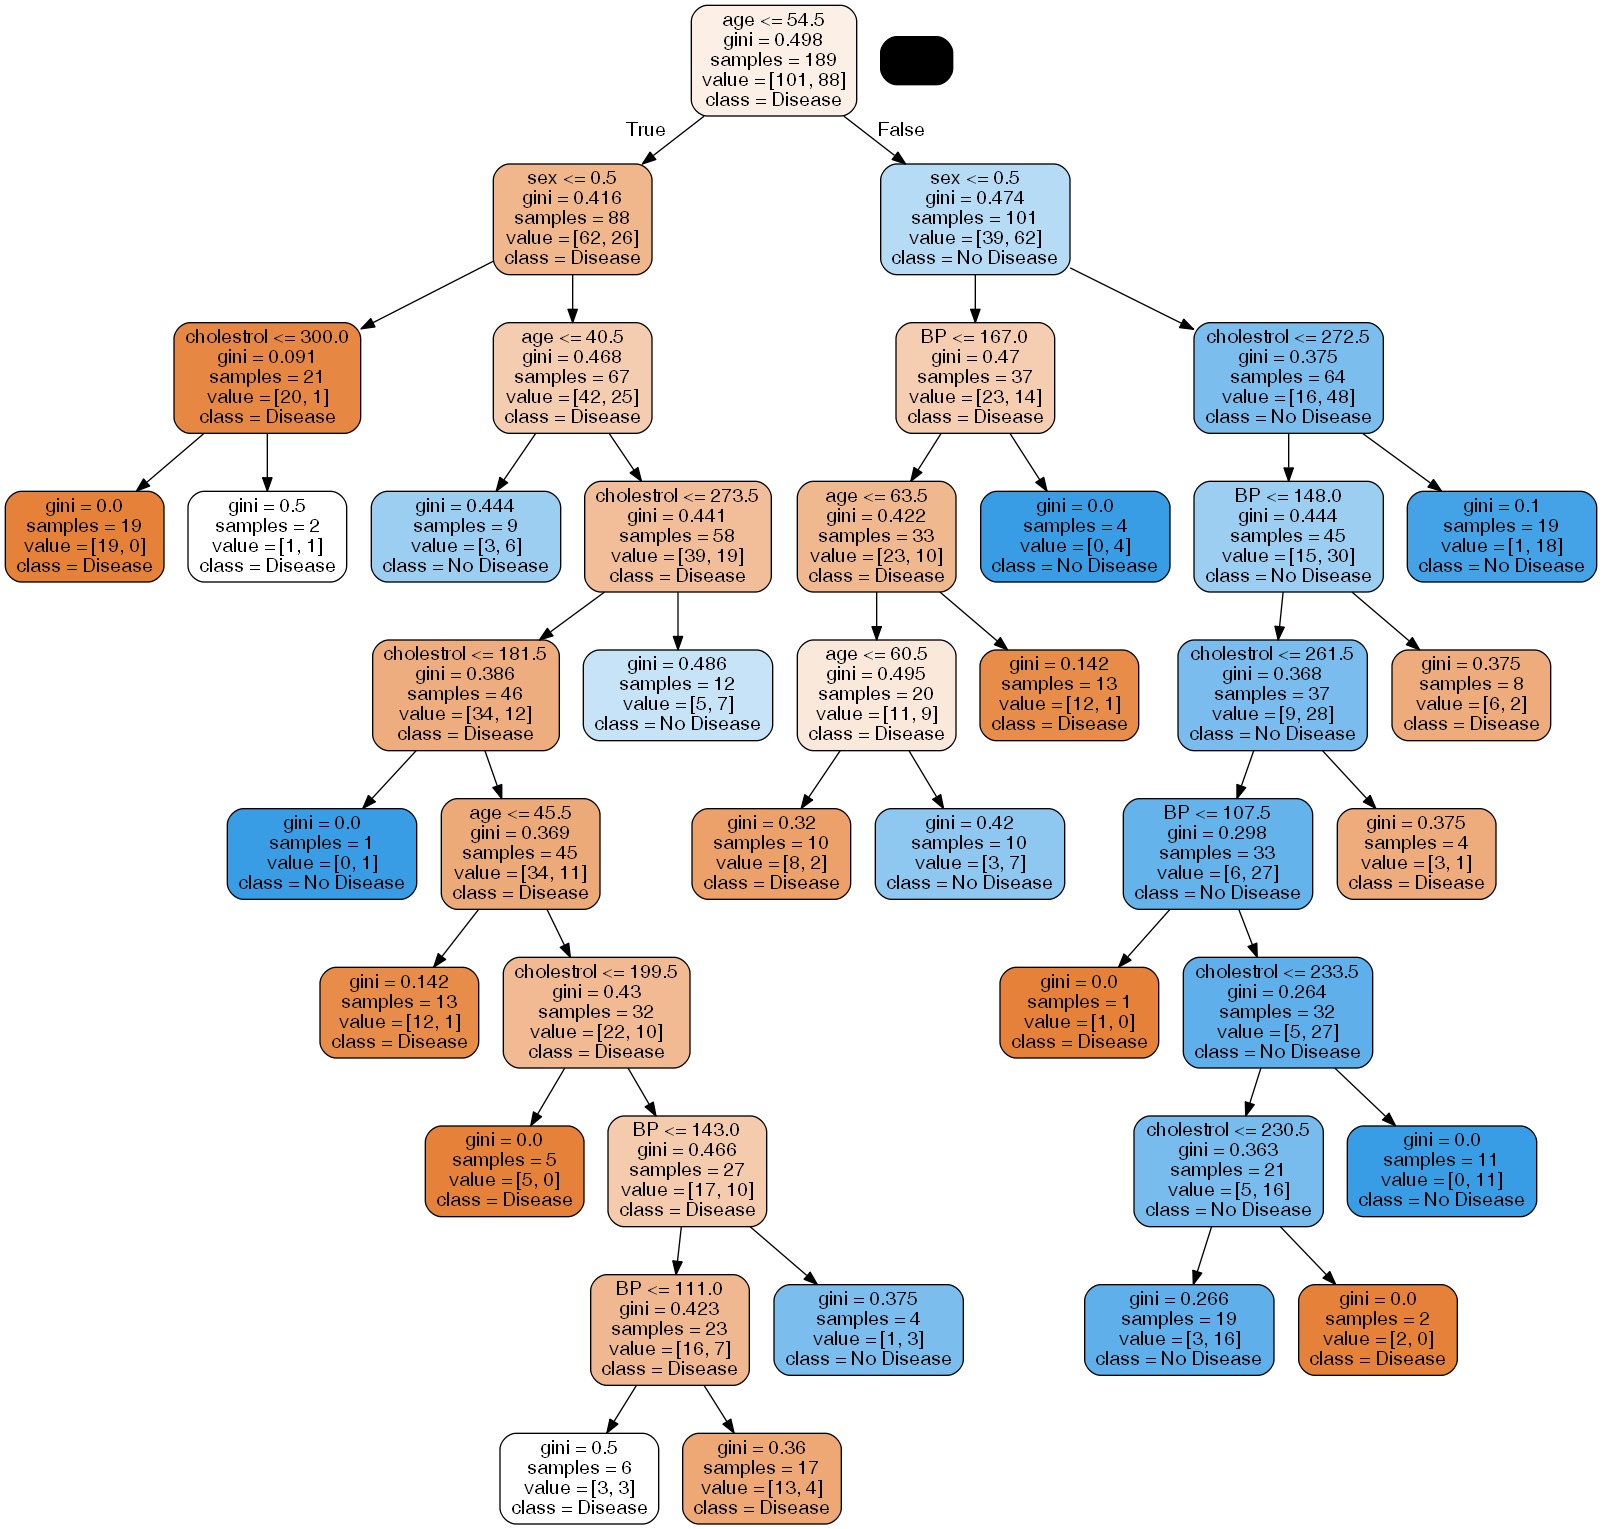

In [29]:
gph=get_dt_graph(dt_min_split)
Image(gph.create_png())

In [30]:
evaluate_model(dt_min_split)

Train Accuracy :  0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy :  0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


## Specifying minimum samples in leaf node

In [31]:
dt_min_leaf=DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

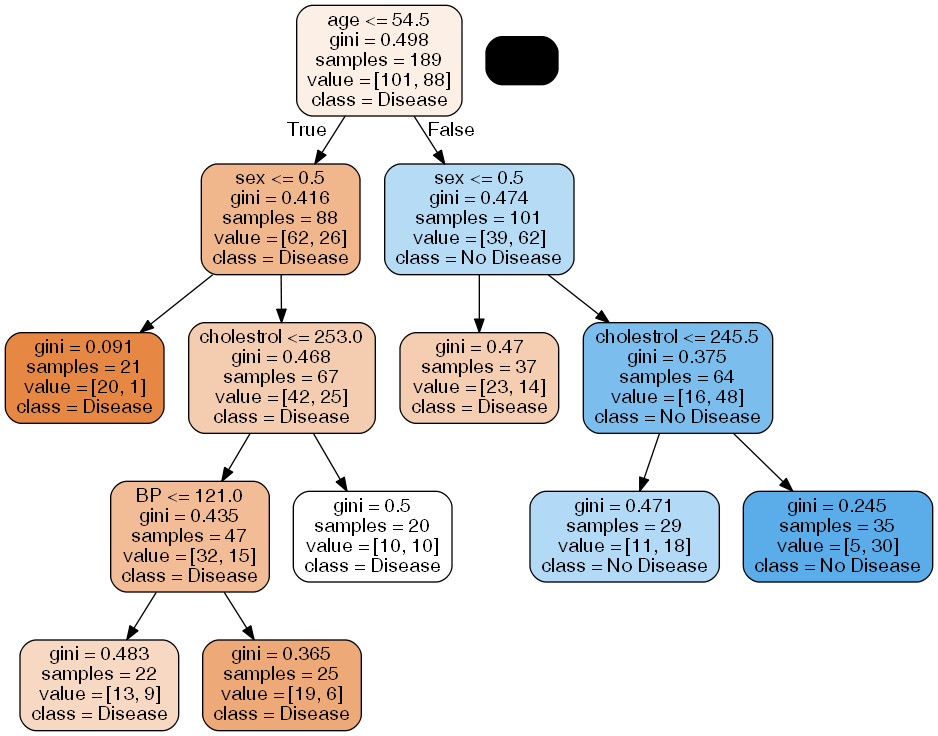

In [32]:
gph=get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [33]:
evaluate_model(dt_min_leaf)

Train Accuracy :  0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy :  0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


## Using Entropy instead of Gini

In [34]:
dt_min_leaf_entropy=DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion="entropy")
dt_min_leaf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

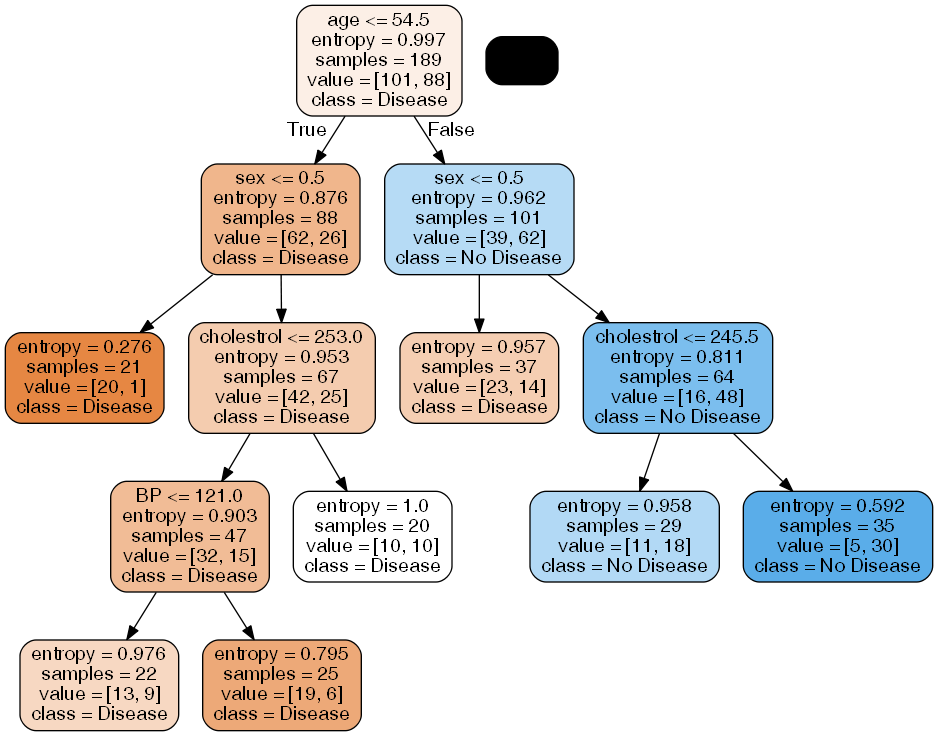

In [36]:
gph=get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [37]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy :  0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy :  0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


## Hyper-parameter tuning

In [38]:
dt=DecisionTreeClassifier(random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV

In [41]:
# Create the parameter grid based on the results of random search 
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':["gini","entropy"]
}

In [42]:
# Instantiate the grid search model
grid_search=GridSearchCV(estimator=dt,
                        param_grid=params,
                        cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [43]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 6.46 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [44]:
score_df=pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004500,0.000500,0.002250,0.000430,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.003998,0.000002,0.002252,0.000433,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.005250,0.001090,0.003002,0.000708,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.005500,0.001658,0.003500,0.001499,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.008000,0.008094,0.002001,0.000002,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [45]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.002748,4.327840e-04,0.001752,0.000435,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.002998,2.226216e-06,0.002250,0.000433,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.005500,1.658121e-03,0.003500,0.001499,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.004250,1.300011e-03,0.002751,0.001299,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.002999,6.822063e-07,0.002000,0.000001,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [48]:
dt_best = grid_search.best_estimator_

In [49]:
evaluate_model(dt_best)

Train Accuracy :  0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy :  0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



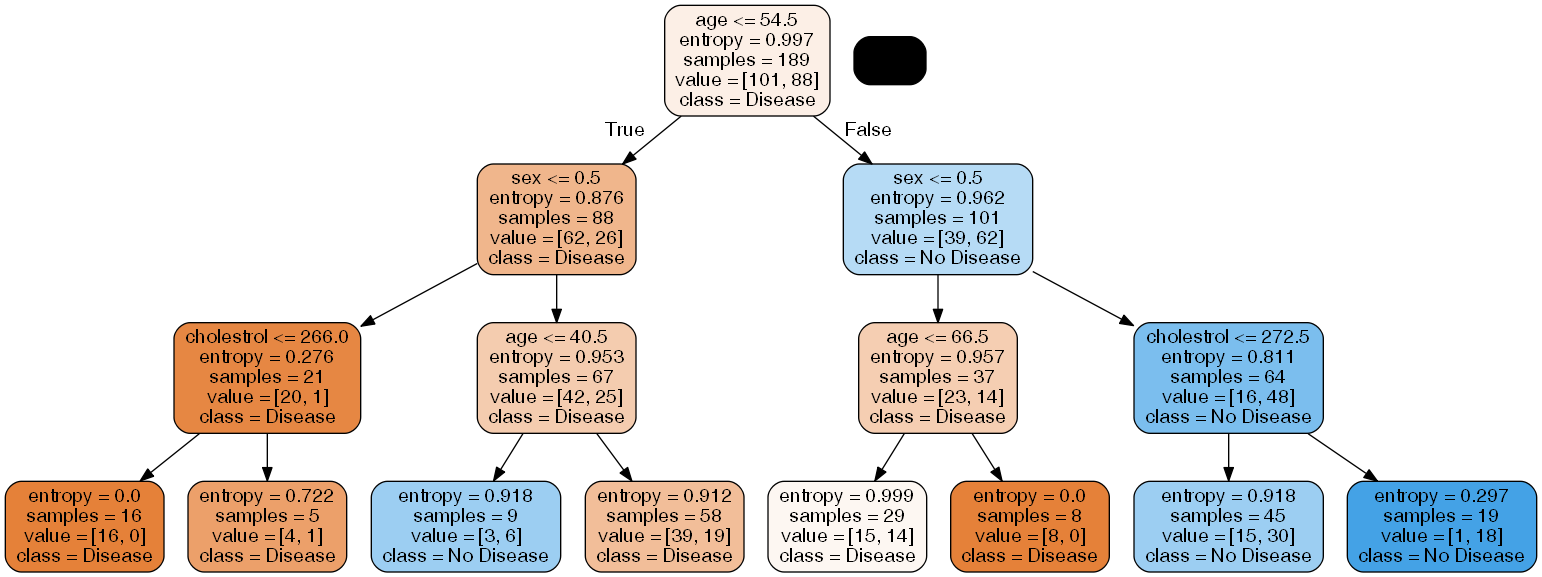

In [52]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())